# Laboratorio 07: Ecuaciones Diferenciales.

---
### Profesores: Juan Marcos Marín Ramírez, Daniel Ruiz Mejía
### Nombre: Candy Valentina López Villanueva
*Métodos computacionales 2025-I*

---

# 1.

En una cadena de desintegración radiactiva, el elemento $A$ se desintegra en el elemento $B$, que a su vez se desintegra en $C$, y así sucesivamente hasta que la cadena de desintegración alcanza un elemento estable. Un ejemplo de tal cadena es $^{90}Sr$, que se desintegra en $^{90}Y$, que a su vez se desintegra a a $^{90}Zr$. La vida media de $^{90}Sr$ es de 28.78 años, y la vida media de $^{90}Y$ es de 2.67 días. $^{90}Zr$ es estable. Esta cadena de desintegración puede describirse mediante las siguientes ecuaciones diferenciales:

$$
\frac{dN_{Sr}}{dt} = -\lambda_{Sr}N_{Sr}
$$

$$
\frac{dN_{Y}}{dt} = -\lambda_{Y}N_{Y} - \frac{dN_{Sr}}{dt}
$$

Grafique la actividad relativa de una muestra de $^{90}Sr$ y otra gráfica de $^{90}Y$ en función del tiempo utlizando el método de Euler. (Una escala de tiempo logarítmica será útil).

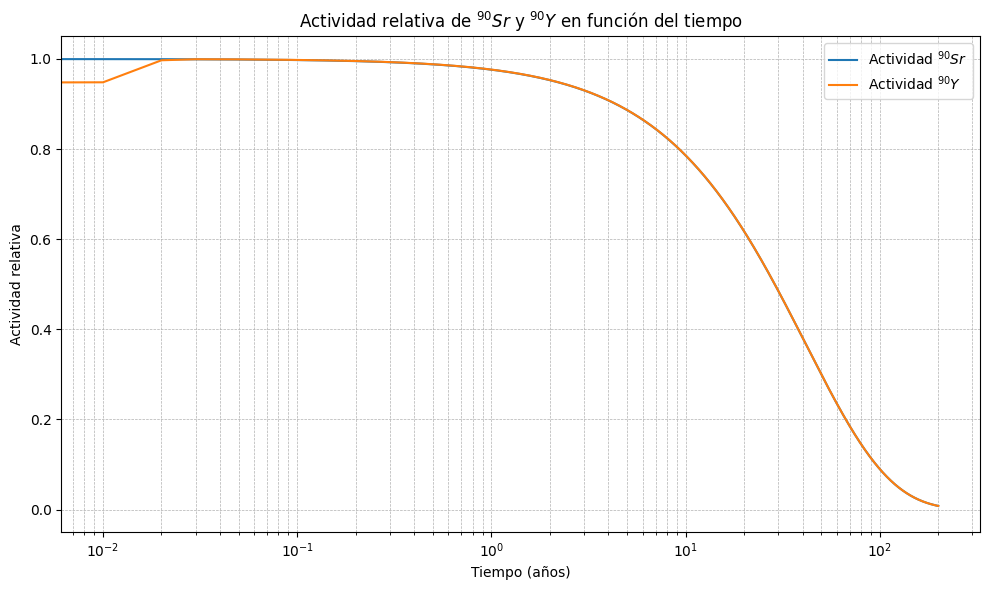

In [1]:
# Aquí va su código
import numpy as np
import matplotlib.pyplot as plt

# Constantes
T_half_Sr = 28.78  # años
T_half_Y = 2.67 / 365.25  # convertir días a años

lambda_Sr = np.log(2) / T_half_Sr
lambda_Y = np.log(2) / T_half_Y

# Tiempo
t_max = 200  # años
dt = 0.01  # paso pequeño para buena precisión
n_steps = int(t_max / dt)

# Inicialización de arrays
t = np.linspace(0, t_max, n_steps)
N_Sr = np.zeros(n_steps)
N_Y = np.zeros(n_steps)

# Condiciones iniciales
N_Sr[0] = 1.0  # cantidad relativa inicial
N_Y[0] = 0.0

# Método de Euler
for i in range(n_steps - 1):
    dN_Sr = -lambda_Sr * N_Sr[i]
    dN_Y = -lambda_Y * N_Y[i] - dN_Sr

    N_Sr[i+1] = N_Sr[i] + dt * dN_Sr
    N_Y[i+1] = N_Y[i] + dt * dN_Y

# Actividades relativas
A_Sr = lambda_Sr * N_Sr / (lambda_Sr * N_Sr[0])  # Normalizadas
A_Y = lambda_Y * N_Y / (lambda_Sr * N_Sr[0])     # Normalizadas a Sr inicial

# Gráfica
plt.figure(figsize=(10, 6))
plt.plot(t, A_Sr, label='Actividad $^{90}Sr$')
plt.plot(t, A_Y, label='Actividad $^{90}Y$')
plt.xscale('log')  # Escala logarítmica en el tiempo
plt.xlabel('Tiempo (años)')
plt.ylabel('Actividad relativa')
plt.title('Actividad relativa de $^{90}Sr$ y $^{90}Y$ en función del tiempo')
plt.legend()
plt.grid(True, which="both", ls="--", lw=0.5)
plt.tight_layout()
plt.show()

# 2.

Este circuito actúa como un filtro pasabajas: envías una señal por la izquierda y sale alterada por la derecha.

<center>

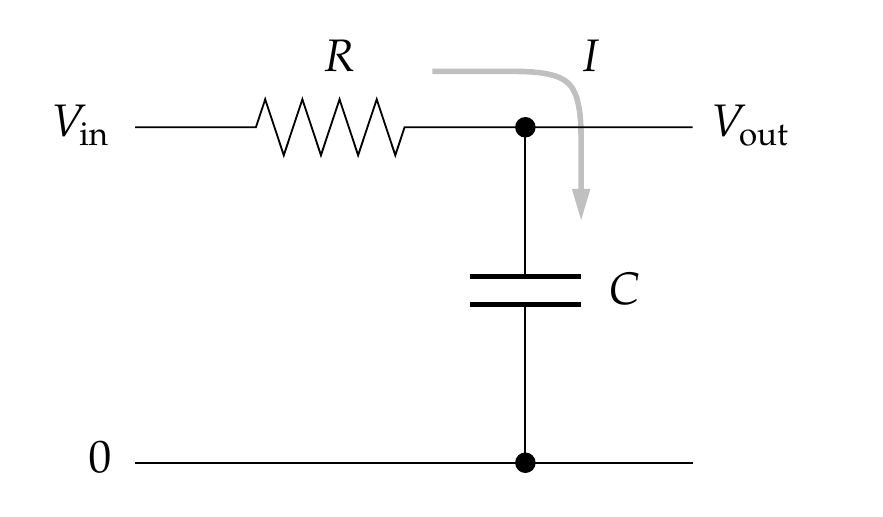

</center>

Usando la ley de Ohm y la ley del capacitor, y asumiendo que la impedancia de la carga de salida es muy alta, de modo que fluye una cantidad despreciable de corriente a través de ella, podemos escribir las ecuaciones que gobiernan este circuito de la siguiente manera. Sea $I$ la corriente que fluye a través de $R$ y hacia el capacitor, y sea $Q$ la carga en el capacitor. Entonces:

$$IR = V_{in} - V_{out}, \quad Q = CV_{out}, \quad I = \frac{dQ}{dt} $$

Sustituyendo la segunda ecuación en la tercera, y luego sustituyendo el resultado en la primera ecuación, encontramos que $ V_{\text{in}} - V_{\text{out}} = RC \left( \frac{dV_{\text{out}}}{dt} \right)$ , o equivalentemente

$$\frac{dV_{\text{out}}}{dt} = \frac{1}{RC} \left( V_{\text{in}} - V_{\text{out}} \right).$$

Escriba un programa para resolver esta ecuación para $V_{\text{out}}(t) $ usando el método de Runge-Kutta de cuarto orden cuando la señal de entrada es una onda cuadrada con frecuencia 1 y amplitud 1:

$$V_{\text{in}}(t) =
\begin{cases}
1 & \text{si } \lfloor 2t \rfloor \text{ es par}, \\
-1 & \text{si } \lfloor 2t \rfloor \text{ es impar},
\end{cases}$$

donde $\lfloor x \rfloor$ significa $x$ redondeado hacia abajo al siguiente entero más bajo. Grafique la salida del circuito filtro desde $t=0$ hasta $t=10$ cuando $RC=0.01, 0.1$ y $1$, con la condición inicial $V_{\text{out}}(0) = 0 $.

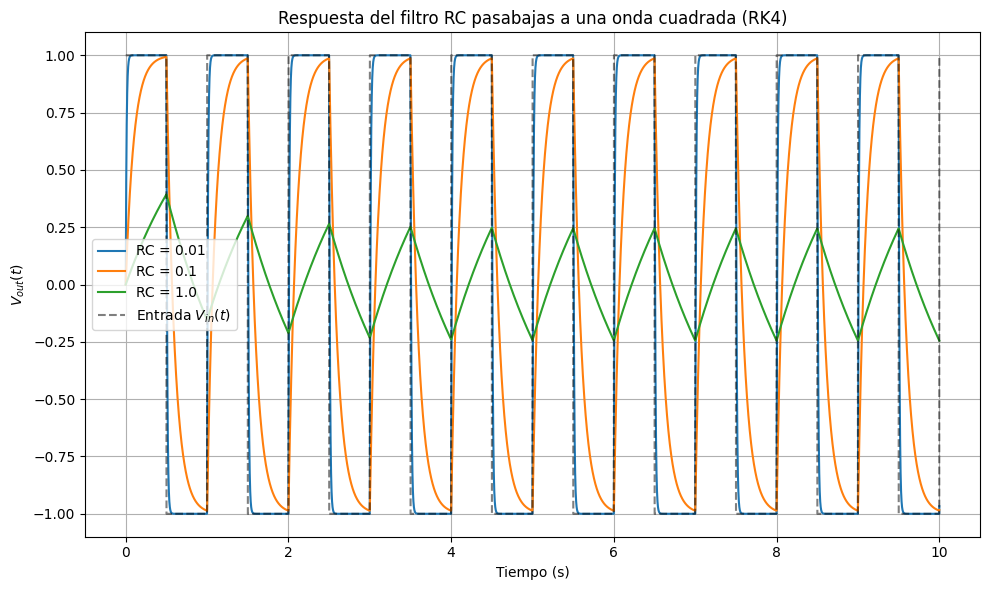

In [2]:
# Aquí va su código
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de tiempo para la simulación
t0 = 0          # Tiempo inicial
tf = 10         # Tiempo final (segundos)
dt = 0.001      # Paso de tiempo (pequeño para precisión)
t = np.arange(t0, tf + dt, dt)  # Vector de tiempos

# Función que define la onda cuadrada de entrada Vin
def square_wave(t):
    """
    Genera una onda cuadrada de amplitud ±1 con frecuencia de 1 Hz.
    Para cada segundo, cambia entre 1 y -1 cada 0.5 segundos.
    """
    return 1 if int(2 * t) % 2 == 0 else -1

# Método de Runge-Kutta de 4to orden para resolver EDOs de la forma dy/dt
def runge_kutta_4(f, y0, t, RC):
    """
    Resuelve una EDO usando el método de Runge-Kutta de 4to orden.

    Parámetros:
        f  : función que define la derivada (dy/dt = f(t, y, RC))
        y0 : valor inicial de y en t[0]
        t  : vector de tiempos
        RC : constante del circuito (producto R*C)

    Retorna:
        Array con la solución y(t)
    """
    y = np.zeros_like(t)  # Inicializa el vector de soluciones
    y[0] = y0             # Condición inicial

    for i in range(1, len(t)):
        ti = t[i-1]
        yi = y[i-1]
        h = t[i] - t[i-1]  # Paso de tiempo

        # Calcula los coeficientes de RK4
        k1 = f(ti, yi, RC)
        k2 = f(ti + h/2, yi + h * k1 / 2, RC)
        k3 = f(ti + h/2, yi + h * k2 / 2, RC)
        k4 = f(ti + h, yi + h * k3, RC)

        # Actualiza la solución
        y[i] = yi + (h / 6) * (k1 + 2*k2 + 2*k3 + k4)

    return y

# Ecuación diferencial del circuito RC pasabajas
def dVout_dt(t, Vout, RC):
    """
    Define la EDO del circuito: dVout/dt = (Vin - Vout) / RC

    Parámetros:
        t     : tiempo actual
        Vout  : valor actual de la salida
        RC    : constante RC del circuito

    Retorna:
        Derivada de Vout en el instante t
    """
    Vin = square_wave(t)  # Calcula la entrada en ese instante
    return (Vin - Vout) / RC

# Valores de RC para simular distintos escenarios
RC_values = [0.01, 0.1, 1.0]

# Simulación y gráfica para cada valor de RC
plt.figure(figsize=(10, 6))

for RC in RC_values:
    # Resuelve la EDO con condición inicial Vout(0) = 0
    Vout = runge_kutta_4(dVout_dt, y0=0, t=t, RC=RC)

    # Grafica la salida para ese valor de RC
    plt.plot(t, Vout, label=f"RC = {RC}")

# También graficamos la onda cuadrada de entrada Vin
Vin = np.array([square_wave(ti) for ti in t])
plt.plot(t, Vin, 'k--', label='Entrada $V_{in}(t)$', alpha=0.5)

# Etiquetas y formato del gráfico
plt.xlabel("Tiempo (s)")
plt.ylabel("$V_{out}(t)$")
plt.title("Respuesta del filtro RC pasabajas a una onda cuadrada (RK4)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 3.

La ecuación logística es un modelo de ecuación diferencial simple que se puede utilizar para relacionar el cambio en la población $\frac{dP}{dt}$ con la población actual, $P$, dada una tasa de crecimiento, $r$, y una capacidad de carga, $K$. La ecuación logística se puede expresar como

$$
\frac{dP}{dt} = rP \left( 1 - \frac{P}{K} \right).
$$

Escribe una función `my_logistic_eq(t, P, r, K)` que represente la ecuación logística con un retorno de `dP`. Tenga en cuenta que este formato permite que `my_logistic_eq` se utilice como un argumento de entrada para `solve_ivp`. Suponga que los argumentos `dP`, `t`, `P`, `r` y `K` son todos escalares, y `dP` es el valor $\frac{dP}{dt}$ dado $r$, $P$ y $K$.
Tenga en cuenta que la ecuación logística tiene una solución analítica definida por

$$
P(t) = \frac{K P_0 e^{rt}}{K + P_0 (e^{rt} - 1)}
$$
donde $P_0$ es la población inicial.

- Grafique $P$ vs $t$ utilizando el método de Euler y de RK4, comparando con la solución analítica.
- Calcule el error relativo de ambas soluciones, considerando la solución analítica como referencia

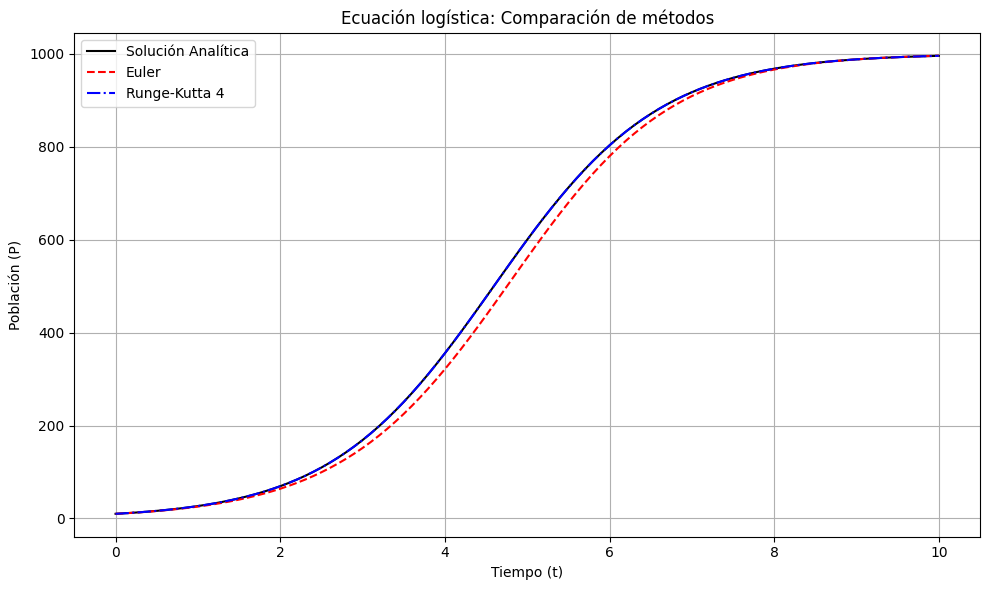

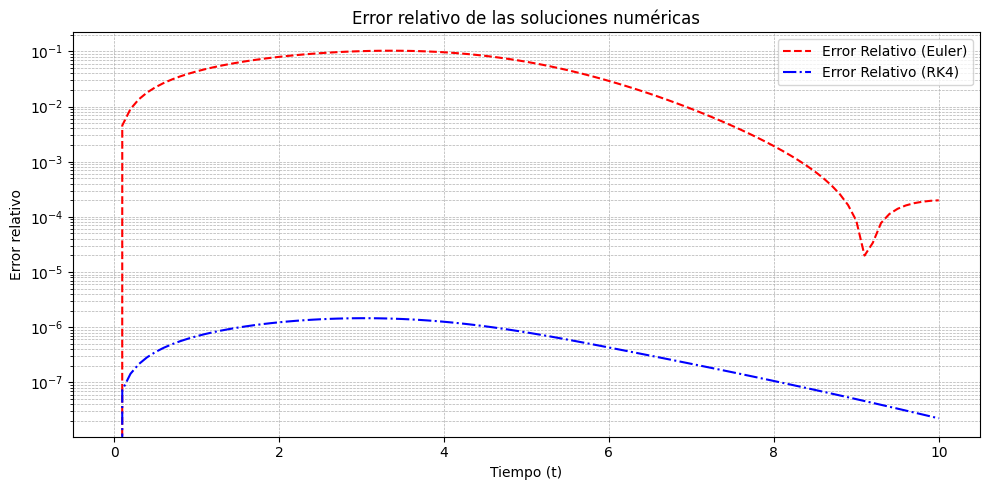

In [3]:
# Aquí va su código
import numpy as np
import matplotlib.pyplot as plt

# 1. Función que define la ecuación logística (forma general)
def my_logistic_eq(t, P, r, K):
    """
    Calcula la derivada dP/dt de la ecuación logística.

    Parámetros:
        t : tiempo (escalar, no se usa en esta función pero es requerido por convención)
        P : población actual
        r : tasa de crecimiento
        K : capacidad de carga

    Retorna:
        dP/dt : tasa de cambio de la población
    """
    return r * P * (1 - P / K)

# 2. Función para la solución analítica exacta
def logistic_analytic(t, P0, r, K):
    """
    Solución analítica de la ecuación logística.

    Parámetros:
        t : vector de tiempos
        P0 : población inicial
        r : tasa de crecimiento
        K : capacidad de carga

    Retorna:
        P(t) : vector de población en cada t
    """
    exp_rt = np.exp(r * t)
    return (K * P0 * exp_rt) / (K + P0 * (exp_rt - 1))

# 3. Método de Euler para resolver la EDO
def euler_method(f, P0, t, r, K):
    """
    Resuelve la EDO usando el método de Euler.

    Parámetros:
        f  : función que define dP/dt
        P0 : valor inicial
        t  : vector de tiempos
        r, K : parámetros de la ecuación

    Retorna:
        P : vector de soluciones aproximadas usando Euler
    """
    P = np.zeros_like(t)
    P[0] = P0
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        P[i] = P[i-1] + dt * f(t[i-1], P[i-1], r, K)
    return P

# 4. Método de Runge-Kutta de 4to orden (RK4)
def runge_kutta_4(f, P0, t, r, K):
    """
    Resuelve la EDO usando el método de Runge-Kutta 4º orden.

    Parámetros:
        f  : función que define dP/dt
        P0 : valor inicial
        t  : vector de tiempos
        r, K : parámetros de la ecuación

    Retorna:
        P : vector de soluciones aproximadas usando RK4
    """
    P = np.zeros_like(t)
    P[0] = P0
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        ti = t[i-1]
        Pi = P[i-1]
        k1 = f(ti, Pi, r, K)
        k2 = f(ti + dt/2, Pi + dt*k1/2, r, K)
        k3 = f(ti + dt/2, Pi + dt*k2/2, r, K)
        k4 = f(ti + dt, Pi + dt*k3, r, K)
        P[i] = Pi + (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)
    return P

# 5. Parámetros y resolución
# Parámetros del modelo
r = 1.0      # tasa de crecimiento
K = 1000.0   # capacidad de carga
P0 = 10.0    # población inicial

# Tiempo
t0 = 0
tf = 10
dt = 0.1
t = np.arange(t0, tf + dt, dt)

# Soluciones
P_euler = euler_method(my_logistic_eq, P0, t, r, K)
P_rk4 = runge_kutta_4(my_logistic_eq, P0, t, r, K)
P_exact = logistic_analytic(t, P0, r, K)

# 6. Cálculo del error relativo
error_euler = np.abs(P_euler - P_exact) / P_exact
error_rk4 = np.abs(P_rk4 - P_exact) / P_exact

# 7. Gráfica de las soluciones
plt.figure(figsize=(10, 6))
plt.plot(t, P_exact, 'k-', label='Solución Analítica')
plt.plot(t, P_euler, 'r--', label='Euler')
plt.plot(t, P_rk4, 'b-.', label='Runge-Kutta 4')
plt.xlabel("Tiempo (t)")
plt.ylabel("Población (P)")
plt.title("Ecuación logística: Comparación de métodos")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 8. Gráfica del error relativo
plt.figure(figsize=(10, 5))
plt.plot(t, error_euler, 'r--', label='Error Relativo (Euler)')
plt.plot(t, error_rk4, 'b-.', label='Error Relativo (RK4)')
plt.xlabel("Tiempo (t)")
plt.ylabel("Error relativo")
plt.yscale('log')  # Escala logarítmica para ver diferencias
plt.title("Error relativo de las soluciones numéricas")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# 4.
Considera la ecuación de movimiento para el desplazamiento angular $u$ de un péndulo rígido no lineal de longitud $l$ (donde $g$ es la aceleración gravitacional):

$$
\ddot{u}= -\frac{g}{l} \sin u,
$$

con las condiciones iniciales:

$$
u(0) = u_0, \quad \dot{u}(0) = 0.
$$

El período de oscilaciones de amplitud arbitraria depende explícitamente del desplazamiento inicial $u_0 \in [-\pi, \pi]$:

$$
T = T_0 \frac{2}{\pi} K \left( \alpha \right).
$$

con
$$
T_0=\sqrt{\frac{l}{g}}
$$

$$
\alpha=\sin^2 \frac{u_0}{2}
$$

$$
K(\alpha)=\int_0^1 \frac{dz}{\sqrt{(1-z^2)(1-\alpha z^2)}}.
$$

- Halle la solución $u(t)$ utilizando el método de Runge Kutta con $h=0.001$ y distintos valores de $u_0=1$ y $u_0=\pi/2$.
- Grafique $T/T_0$ en función de $u_0$ y compare con el resultado analítico.

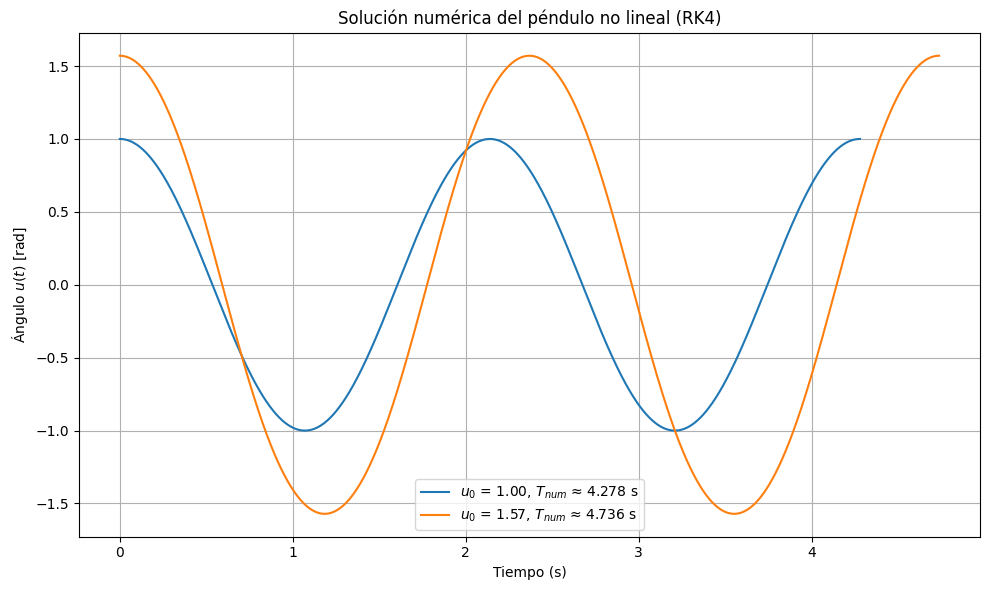

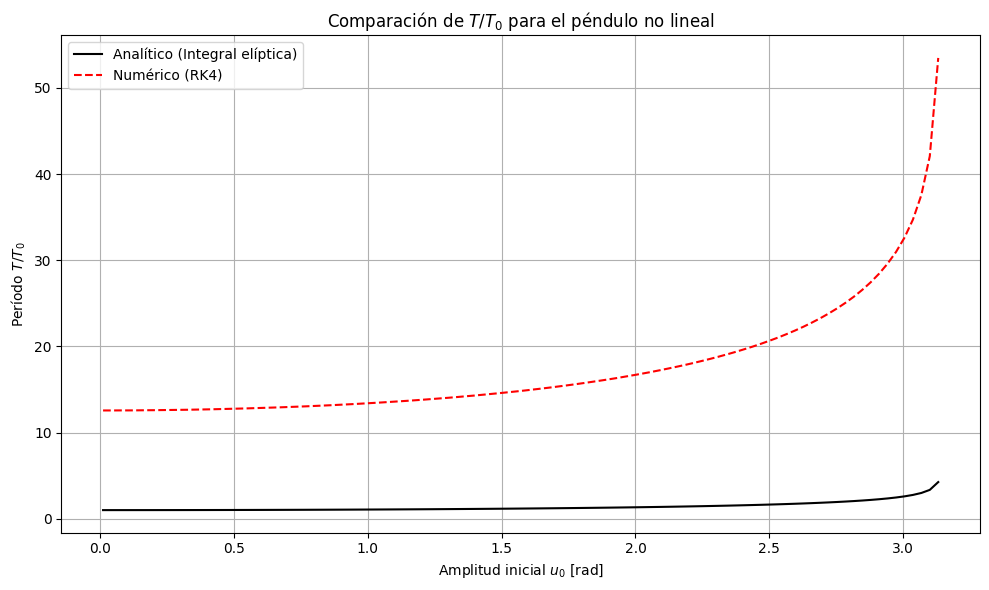

In [4]:
# Aquí va su código
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import ellipk

# Constantes físicas
g = 9.81        # Aceleración gravitacional (m/s^2)
l = 1.0         # Longitud del péndulo (m)
T0 = np.sqrt(l / g)  # Periodo pequeño (linealizado)

# Sistema de EDOs para el péndulo no lineal
def pendulum_system(t, Y):
    """
    Define el sistema de ecuaciones del péndulo:
    Y = [u, v], con:
        u: ángulo
        v: velocidad angular
    Retorna: [du/dt, dv/dt]
    """
    u, v = Y
    du_dt = v
    dv_dt = -(g / l) * np.sin(u)
    return np.array([du_dt, dv_dt])

# Método de Runge-Kutta 4to orden
def rk4_step(f, t, Y, h):
    """
    Ejecuta un solo paso del método RK4 para un sistema de EDOs.

    Parámetros:
        f : función del sistema (de t y Y)
        t : instante de tiempo actual
        Y : vector de estado actual
        h : paso de integración

    Retorna:
        Y_next : vector de estado actualizado
    """
    k1 = f(t, Y)
    k2 = f(t + h/2, Y + h * k1 / 2)
    k3 = f(t + h/2, Y + h * k2 / 2)
    k4 = f(t + h, Y + h * k3)
    return Y + (h/6) * (k1 + 2*k2 + 2*k3 + k4)

# Función para integrar hasta un ciclo y estimar el periodo
def simulate_pendulum(u0, h=0.001, max_time=20):
    """
    Simula el movimiento del péndulo para un valor de u0, integrando con RK4.

    Parámetros:
        u0 : ángulo inicial
        h : paso de integración
        max_time : tiempo máximo para evitar ciclos infinitos

    Retorna:
        t_vals : arreglo de tiempos
        u_vals : arreglo de ángulos u(t)
        T_num  : periodo numérico estimado (por cruce de velocidad por cero)
    """
    Y = np.array([u0, 0.0])  # Condición inicial: u=u0, v=0
    t = 0.0
    t_vals = [t]
    u_vals = [Y[0]]

    crossings = []
    prev_v = Y[1]

    while t < max_time:
        Y = rk4_step(pendulum_system, t, Y, h)
        t += h
        t_vals.append(t)
        u_vals.append(Y[0])

        # Detección de cruce por cero de la velocidad
        if prev_v > 0 and Y[1] < 0:
            crossings.append(t)
            if len(crossings) == 2:
                T_num = 2 * (crossings[1] - crossings[0])
                break
        prev_v = Y[1]
    else:
        T_num = np.nan  # No encontró cruce si tarda mucho

    return np.array(t_vals), np.array(u_vals), T_num

# Solución analítica: cálculo del periodo exacto
def analytical_period(u0):
    """
    Calcula el período analítico para un ángulo inicial u0.
    Usa la fórmula con integral elíptica completa.

    Retorna:
        T_analytic : periodo teórico (exacto)
    """
    alpha = np.sin(u0 / 2)**2
    K = ellipk(alpha)  # Integral elíptica completa de primera especie
    return T0 * (2 / np.pi) * K

# Parte 1: comparar u(t) para u0 = 1 y u0 = π/2
u0_values = [1, np.pi/2]

plt.figure(figsize=(10, 6))
for u0 in u0_values:
    t_vals, u_vals, T_num = simulate_pendulum(u0)
    plt.plot(t_vals, u_vals, label=f"$u_0$ = {u0:.2f}, $T_{{num}}$ ≈ {T_num:.3f} s")

plt.title("Solución numérica del péndulo no lineal (RK4)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Ángulo $u(t)$ [rad]")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Parte 2: comparar T/T0 numérico vs analítico
u0_range = np.linspace(0.01, np.pi - 0.01, 100)
T_num_list = []
T_ana_list = []

for u0 in u0_range:
    _, _, T_num = simulate_pendulum(u0)
    T_ana = analytical_period(u0)
    T_num_list.append(T_num / T0)
    T_ana_list.append(T_ana / T0)

# Gráfica comparativa
plt.figure(figsize=(10, 6))
plt.plot(u0_range, T_ana_list, 'k-', label="Analítico (Integral elíptica)")
plt.plot(u0_range, T_num_list, 'r--', label="Numérico (RK4)")
plt.title("Comparación de $T/T_0$ para el péndulo no lineal")
plt.xlabel("Amplitud inicial $u_0$ [rad]")
plt.ylabel("Período $T / T_0$")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 5.

Considere un sistema ecológico aislado donde habitan dos especies: conejos ($x$) y zorros ($y$). La dinámica poblacional de ambas especies se describe mediante el siguiente sistema de ecuaciones diferenciales:

$$\frac{dx}{dt} = \alpha x - \beta xy$$
$$\frac{dy}{dt} = -\gamma y + \delta xy$$

Donde:
- $x(t)$ representa la población de conejos en el tiempo t
- $y(t)$ representa la población de zorros en el tiempo t
- $\alpha$ = 0.8 (tasa de reproducción de los conejos)
- $\beta$ = 0.04 (tasa de depredación de conejos por zorros)
- $\gamma$ = 0.3 (tasa de mortalidad natural de los zorros)
- $\delta$ = 0.01 (eficiencia de conversión de presas consumidas en nuevos depredadores)

Condiciones iniciales:
- $x(0)$ = 50 (población inicial de conejos)
- $y(0)$ = 20 (población inicial de zorros)


**a)** Implemente el método de Euler para resolver este sistema con un paso temporal de $h$ = 0.1, simulando la evolución del sistema durante 50 unidades de tiempo.

**b)** Implemente el método de Runge-Kutta de segundo y cuarto orden para resolver el mismo sistema con idénticos parámetros.

**c)** Compare los resultados de Euler y RK4 mediante:
   - Gráficas de la evolución temporal de ambas poblaciones
   - Diagrama de fase (x vs y)
   - Cálculo del error relativo entre ambas soluciones, considerando RK4 como referencia

**d)** Analice la estabilidad de ambos métodos cambiando el tamaño del paso temporal ($h$ = 0.5, $h$ = 0.05). ¿Qué observa? Explique por qué ocurre.

**e)** Investigue cómo las variaciones en los parámetros α, β, γ y δ afectan la dinámica del sistema. Elija un parámetro y realice simulaciones con al menos tres valores distintos.

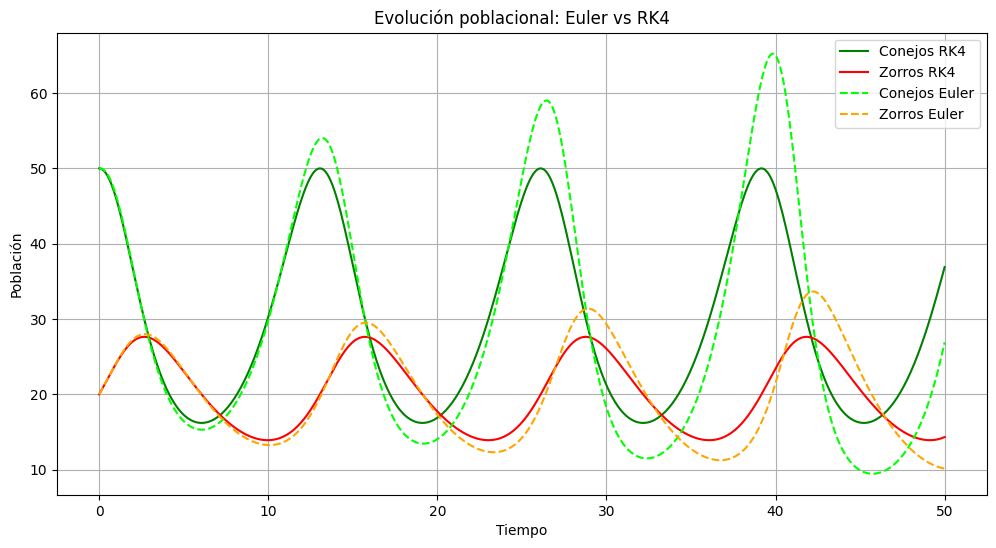

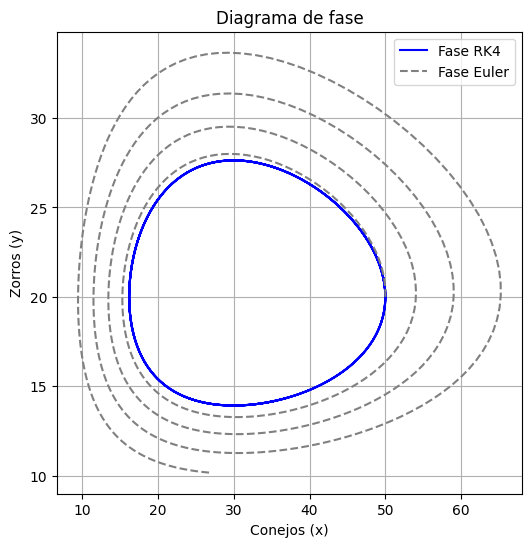

Error relativo conejos (Euler vs RK4): 0.1534
Error relativo zorros (Euler vs RK4): 0.0821


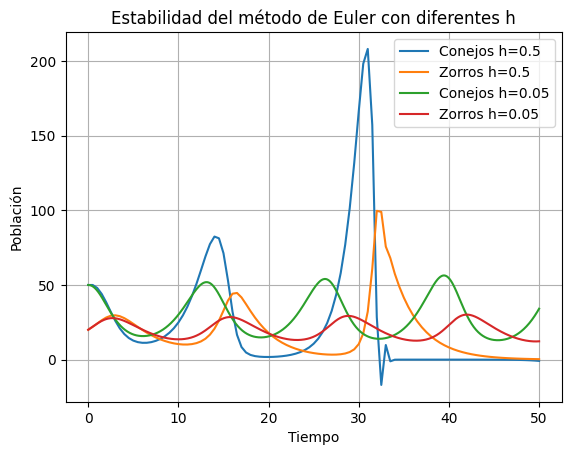

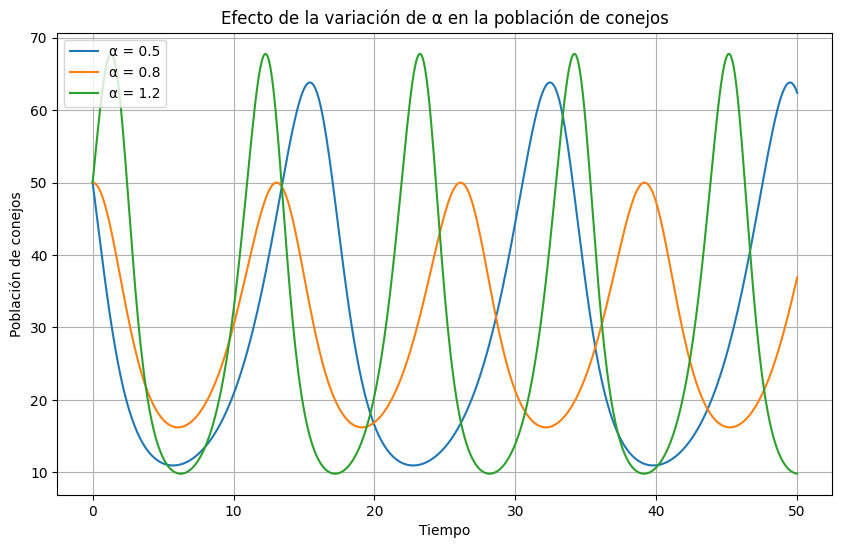

In [5]:
#Aquí va su código
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del modelo ecológico
alpha = 0.8   # Tasa de reproducción de conejos
beta = 0.04   # Tasa de depredación
gamma = 0.3   # Mortalidad natural de zorros
delta = 0.01  # Conversión de presas en depredadores

# Condiciones iniciales
x0 = 50  # Conejos
y0 = 20  # Zorros
t0 = 0
tf = 50  # Tiempo final

def lotka_volterra(x, y):
    """
    Calcula las derivadas dx/dt y dy/dt del sistema Lotka-Volterra.

    Parámetros:
    - x: población de conejos
    - y: población de zorros

    Retorna:
    - dxdt: derivada de x respecto al tiempo
    - dydt: derivada de y respecto al tiempo
    """
    dxdt = alpha * x - beta * x * y
    dydt = -gamma * y + delta * x * y
    return dxdt, dydt

def euler_method(x0, y0, h, t0, tf):
    """
    Implementa el método de Euler para resolver el sistema.

    Parámetros:
    - x0, y0: condiciones iniciales
    - h: paso temporal
    - t0, tf: tiempo inicial y final

    Retorna:
    - t_vals: arreglo de tiempos
    - x_vals: arreglo con la población de conejos
    - y_vals: arreglo con la población de zorros
    """
    N = int((tf - t0) / h)
    t_vals = np.linspace(t0, tf, N+1)
    x_vals = np.zeros(N+1)
    y_vals = np.zeros(N+1)
    x_vals[0], y_vals[0] = x0, y0

    for i in range(N):
        dx, dy = lotka_volterra(x_vals[i], y_vals[i])
        x_vals[i+1] = x_vals[i] + h * dx
        y_vals[i+1] = y_vals[i] + h * dy

    return t_vals, x_vals, y_vals

def rk2_method(x0, y0, h, t0, tf):
    """
    Método de Runge-Kutta de segundo orden (Heun) para el sistema.

    Retorna:
    - t_vals, x_vals, y_vals como en euler_method
    """
    N = int((tf - t0) / h)
    t_vals = np.linspace(t0, tf, N+1)
    x_vals = np.zeros(N+1)
    y_vals = np.zeros(N+1)
    x_vals[0], y_vals[0] = x0, y0

    for i in range(N):
        dx1, dy1 = lotka_volterra(x_vals[i], y_vals[i])
        x_e = x_vals[i] + h * dx1
        y_e = y_vals[i] + h * dy1
        dx2, dy2 = lotka_volterra(x_e, y_e)
        x_vals[i+1] = x_vals[i] + (h/2) * (dx1 + dx2)
        y_vals[i+1] = y_vals[i] + (h/2) * (dy1 + dy2)

    return t_vals, x_vals, y_vals

def rk4_method(x0, y0, h, t0, tf):
    """
    Método de Runge-Kutta de cuarto orden para el sistema.

    Retorna:
    - t_vals, x_vals, y_vals como en euler_method
    """
    N = int((tf - t0) / h)
    t_vals = np.linspace(t0, tf, N+1)
    x_vals = np.zeros(N+1)
    y_vals = np.zeros(N+1)
    x_vals[0], y_vals[0] = x0, y0

    for i in range(N):
        k1x, k1y = lotka_volterra(x_vals[i], y_vals[i])
        k2x, k2y = lotka_volterra(x_vals[i] + 0.5*h*k1x, y_vals[i] + 0.5*h*k1y)
        k3x, k3y = lotka_volterra(x_vals[i] + 0.5*h*k2x, y_vals[i] + 0.5*h*k2y)
        k4x, k4y = lotka_volterra(x_vals[i] + h*k3x, y_vals[i] + h*k3y)

        x_vals[i+1] = x_vals[i] + (h/6)*(k1x + 2*k2x + 2*k3x + k4x)
        y_vals[i+1] = y_vals[i] + (h/6)*(k1y + 2*k2y + 2*k3y + k4y)

    return t_vals, x_vals, y_vals

def relative_error(reference, estimate):
    """
    Calcula el error relativo promedio entre dos soluciones.

    Parámetros:
    - reference: arreglo de referencia (ej. RK4)
    - estimate: arreglo estimado (ej. Euler)

    Retorna:
    - Error relativo promedio
    """
    return np.mean(np.abs((reference - estimate) / reference))

# Simulación con h=0.1
h = 0.1
t_euler, x_euler, y_euler = euler_method(x0, y0, h, t0, tf)
t_rk2, x_rk2, y_rk2 = rk2_method(x0, y0, h, t0, tf)
t_rk4, x_rk4, y_rk4 = rk4_method(x0, y0, h, t0, tf)

# Gráficas de evolución temporal
plt.figure(figsize=(12, 6))
plt.plot(t_rk4, x_rk4, label='Conejos RK4', color='green')
plt.plot(t_rk4, y_rk4, label='Zorros RK4', color='red')
plt.plot(t_euler, x_euler, '--', label='Conejos Euler', color='lime')
plt.plot(t_euler, y_euler, '--', label='Zorros Euler', color='orange')
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title('Evolución poblacional: Euler vs RK4')
plt.legend()
plt.grid(True)
plt.show()

# Diagrama de fase (x vs y)
plt.figure(figsize=(6,6))
plt.plot(x_rk4, y_rk4, label='Fase RK4', color='blue')
plt.plot(x_euler, y_euler, '--', label='Fase Euler', color='gray')
plt.xlabel('Conejos (x)')
plt.ylabel('Zorros (y)')
plt.title('Diagrama de fase')
plt.legend()
plt.grid(True)
plt.show()

# Cálculo de errores relativos
error_x = relative_error(x_rk4, x_euler)
error_y = relative_error(y_rk4, y_euler)
print(f"Error relativo conejos (Euler vs RK4): {error_x:.4f}")
print(f"Error relativo zorros (Euler vs RK4): {error_y:.4f}")

# --- Análisis de estabilidad con diferentes h ---
for h_test in [0.5, 0.05]:
    t_test, x_test, y_test = euler_method(x0, y0, h_test, t0, tf)
    plt.plot(t_test, x_test, label=f'Conejos h={h_test}')
    plt.plot(t_test, y_test, label=f'Zorros h={h_test}')

plt.xlabel("Tiempo")
plt.ylabel("Población")
plt.title("Estabilidad del método de Euler con diferentes h")
plt.legend()
plt.grid(True)
plt.show()

# --- Variación del parámetro alpha ---
plt.figure(figsize=(10, 6))
for a in [0.5, 0.8, 1.2]:
    alpha = a  # Se modifica la tasa de crecimiento de conejos
    t_var, x_var, y_var = rk4_method(x0, y0, 0.1, t0, tf)
    plt.plot(t_var, x_var, label=f'α = {a}')

plt.xlabel("Tiempo")
plt.ylabel("Población de conejos")
plt.title("Efecto de la variación de α en la población de conejos")
plt.legend()
plt.grid(True)
plt.show()

**d.) Analice la estabilidad de ambos métodos cambiando el tamaño del paso temporal ($h  = 0.5$,  $h = 0.05$). ¿Qué observa? Explique por qué ocurre.**

***d.) Análisis de la estabilidad al cambiar el paso temporal $h$***

Observación:

En la tercera gráfica, se muestran los resultados del método de Euler para dos tamaños de paso:

•	$h = 0.5$

•	$h = 0.05$

Se observa que:

•	Para $h = 0.5$, el comportamiento de las poblaciones se vuelve inestable y no realista: los conejos y los zorros alcanzan valores extremos (explosivos), e incluso negativos.

•	Para $h = 0.05$, las curvas son mucho más suaves y realistas, manteniéndose dentro de un rango biológicamente razonable.

Explicación:

El método de Euler es explícito y de primer orden, por lo tanto:

•	Es condicionalmente estable, lo que significa que requiere pasos pequeños para dar soluciones precisas y estables.

•	Con pasos grandes como $h = 0.5$, el método acumula errores rápidamente, lo que genera oscilaciones artificiales, explosión de valores o colapso de las poblaciones.

Conclusión:

La estabilidad del método de Euler depende fuertemente del tamaño de paso. Reducir $h$ mejora la precisión pero requiere más cálculos. Métodos como RK4 son más estables y precisos incluso con pasos más grandes.

**e.) Investigue cómo las variaciones en los parámetros α, β, γ y δ afectan la dinámica del sistema. Elija un parámetro y realice simulaciones con al menos tres valores distintos.**

**e.) Análisis de sensibilidad del sistema a los parámetros — variación de $\alpha$**

Observación:

En la cuarta gráfica se estudia cómo varía la población de conejos al modificar el parámetro \alpha (tasa de reproducción de los conejos) para tres valores:

•	$\alpha = 0.5$

•	$\alpha = 0.8$

•	$\alpha = 1.2$

Se observa que:

•	A mayor $\alpha$, los conejos se reproducen más rápido, por lo que las oscilaciones son más altas y frecuentes.

•	A menor $\alpha$, la reproducción es más lenta, y la población se mantiene más estable y con menor amplitud.

Explicación:

•	$\alpha$ es el término que impulsa el crecimiento de los conejos. Al aumentarlo:

•	Hay más conejos disponibles como alimento para los zorros.

•	Esto puede hacer crecer también la población de zorros en respuesta.

•	El sistema entra en oscilaciones más rápidas y más marcadas, por la retroalimentación entre presa y depredador.

Conclusión:

La dinámica poblacional del sistema es altamente sensible a los parámetros. Cambiar ligeramente $\alpha$ afecta no solo los valores máximos y mínimos de población, sino también la frecuencia de los ciclos.

# 6.

El oscilador armónico forzado amortiguado está dado por la siguiente ecuación:

$$\frac{d^{2}x}{dt^{2}} + \gamma \frac{dx}{dt} + \omega_{0}^{2} x = \frac{F}{m},$$

donde $\gamma$ es la constante de amortiguamiento, $\omega_{0} = \sqrt{k/m}$ es la frecuencia angular natural, $m$ es la masa y $F$ es la fuerza impulsora. Esta ecuación de segundo orden también puede escribirse con dos ecuaciones de primer orden:

$$
\frac{dx}{dt} = v
$$

$$
\frac{dv}{dt} = \frac{F}{m} - \gamma v - \omega_{0}^{2} x
$$

que es la forma que usaremos para la integración numérica.

La energía del oscilador armónico es:

$$
E = \frac{1}{2} m v^{2} + \frac{1}{2} k x^{2},
$$

Considere $x(0)=0$ y $v(0)=1$. Grafique $x(t)$ y $E(t)$ para los siguientes casos:

- $F=0$ y para $\gamma=[0,0.05,0.3]$.
- $\gamma=0$, $F=F_0\cos{(\omega t)} \ e^{-t^2/T^2}$ con $F_0=1N$, $T=10s$ y $\omega=[0,0.8\omega_0,\omega_0]$.


In [6]:
#Aquí va su código
import numpy as np
import matplotlib.pyplot as plt

# Parámetros generales del sistema
m = 1.0          # Masa (kg)
k = 1.0          # Constante del resorte (N/m)
omega_0 = np.sqrt(k / m)  # Frecuencia natural (rad/s)

# Condiciones iniciales
x0 = 0.0         # Posición inicial (m)
v0 = 1.0         # Velocidad inicial (m/s)

# Definición del sistema de ecuaciones

def fuerza_impulsora(t, F0=0, omega=0, T=10):
    """
    Calcula la fuerza impulsora en función del tiempo, para el segundo caso (forzado).
    """
    return F0 * np.cos(omega * t) * np.exp(-t**2 / T**2)

def sistema(t, y, gamma, F0=0, omega=0, T=10):
    """
    Devuelve las derivadas [dx/dt, dv/dt] del sistema oscilatorio amortiguado/forzado.

    Parámetros:
    - t: tiempo actual
    - y: vector [x, v] con la posición y velocidad
    - gamma: coeficiente de amortiguamiento
    - F0, omega, T: parámetros de la fuerza impulsora

    Retorna:
    - dydt: lista con [dx/dt, dv/dt]
    """
    x, v = y
    F_t = fuerza_impulsora(t, F0, omega, T)
    dxdt = v
    dvdt = (F_t / m) - gamma * v - (k / m) * x
    return np.array([dxdt, dvdt])

# Integrador de Euler

def integrar(gamma, F0=0, omega=0, T=10, dt=0.01, t_max=50):
    """
    Integra la ecuación de movimiento usando el método de Euler.

    Parámetros:
    - gamma: amortiguamiento
    - F0, omega, T: parámetros de la fuerza impulsora
    - dt: paso de tiempo
    - t_max: tiempo máximo de integración

    Retorna:
    - t: arreglo de tiempos
    - x: posición en cada tiempo
    - E: energía en cada tiempo
    """
    N = int(t_max / dt)
    t = np.linspace(0, t_max, N)
    y = np.zeros((N, 2))
    E = np.zeros(N)

    y[0] = [x0, v0]  # Condiciones iniciales

    for i in range(N - 1):
        dy = sistema(t[i], y[i], gamma, F0, omega, T)
        y[i + 1] = y[i] + dy * dt

        x_i, v_i = y[i]
        E[i] = 0.5 * m * v_i**2 + 0.5 * k * x_i**2

    # Último punto de energía
    x_last, v_last = y[-1]
    E[-1] = 0.5 * m * v_last**2 + 0.5 * k * x_last**2

    return t, y[:, 0], E

# Función para graficar

def graficar_resultados(t, x, E, titulo="Oscilador"):
    """
    Grafica la posición y energía del sistema en función del tiempo.
    """
    fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

    axs[0].plot(t, x, label='x(t)', color='blue')
    axs[0].set_ylabel('Posición (m)')
    axs[0].legend()
    axs[0].grid(True)

    axs[1].plot(t, E, label='Energía (J)', color='red')
    axs[1].set_xlabel('Tiempo (s)')
    axs[1].set_ylabel('Energía')
    axs[1].legend()
    axs[1].grid(True)

    plt.suptitle(titulo)
    plt.tight_layout()
    plt.show()

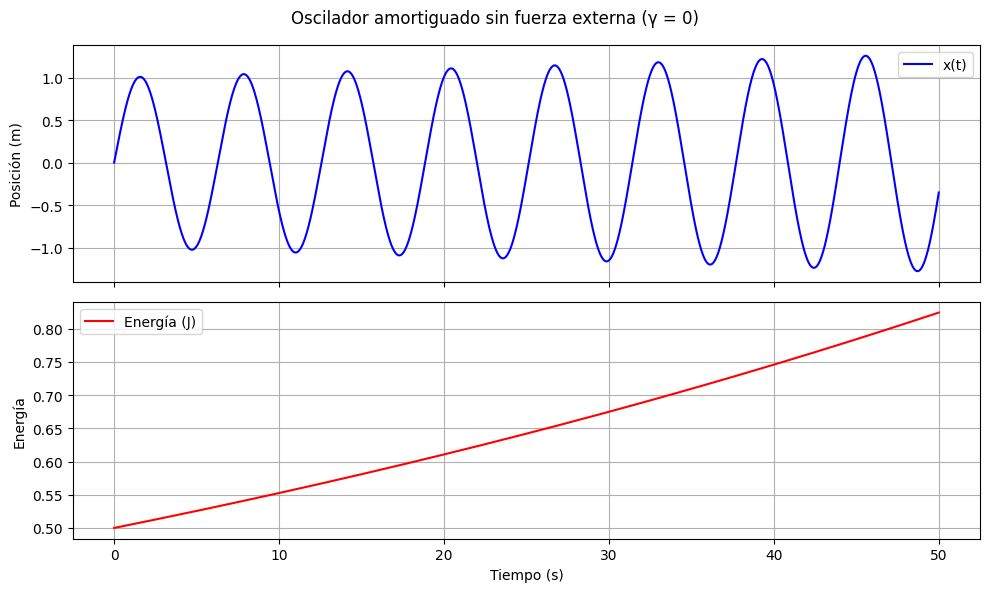

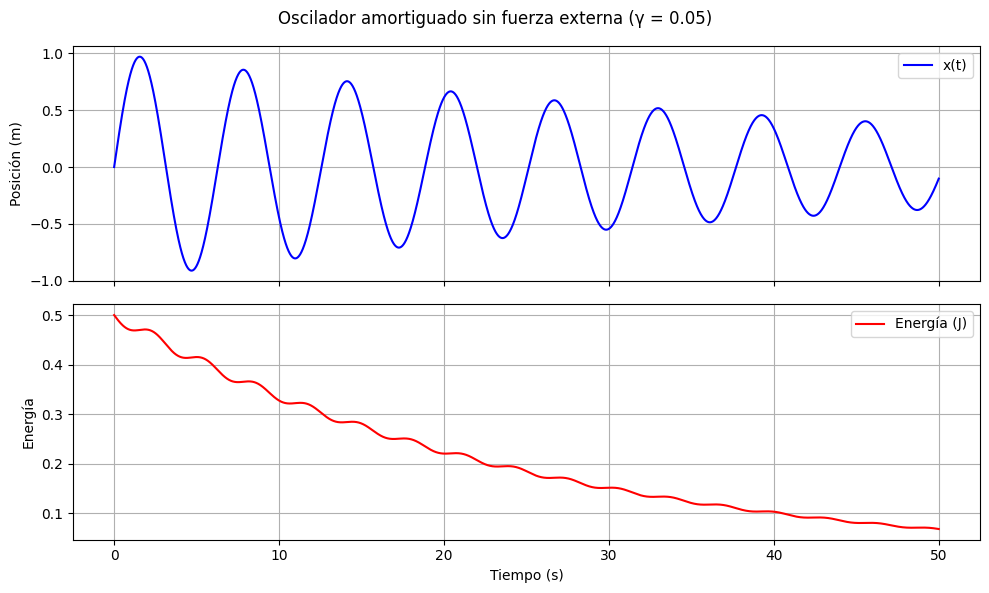

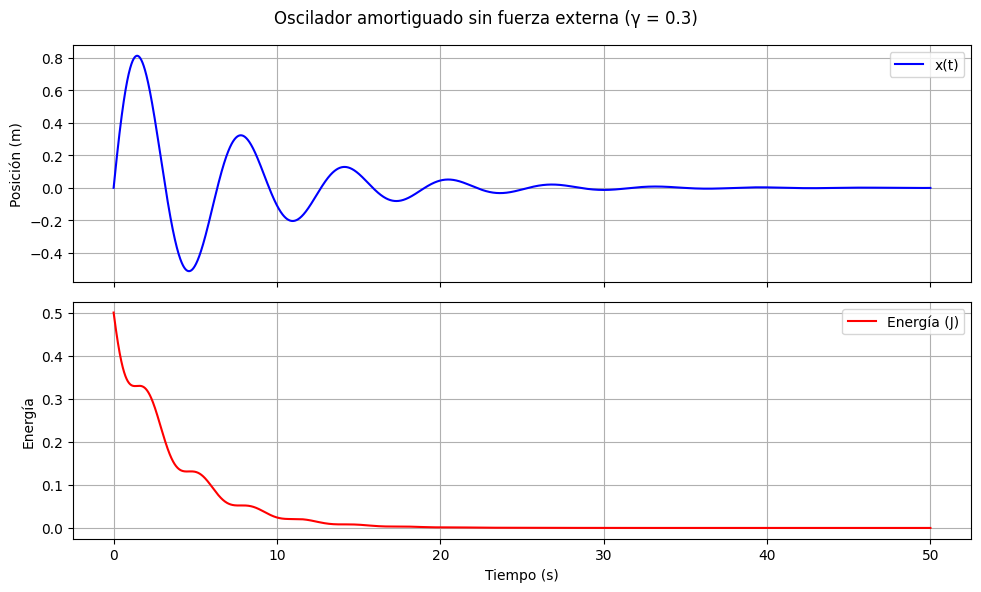

In [7]:
# Caso 1: Oscilador amortiguado sin fuerza externa
gammas = [0, 0.05, 0.3]

for gamma in gammas:
    t, x, E = integrar(gamma=gamma, F0=0, omega=0, T=10)
    titulo = f"Oscilador amortiguado sin fuerza externa (γ = {gamma})"
    graficar_resultados(t, x, E, titulo)

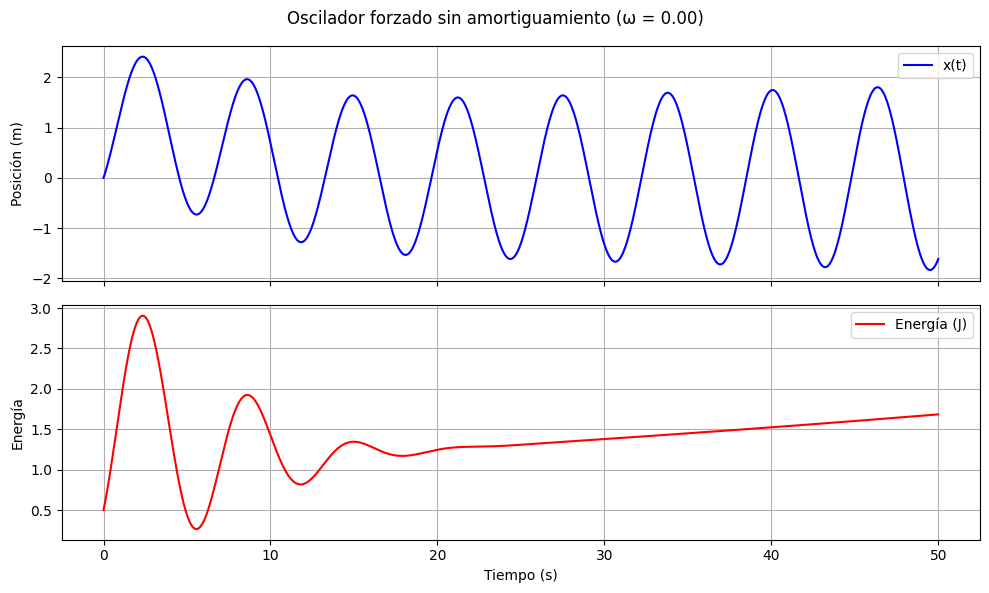

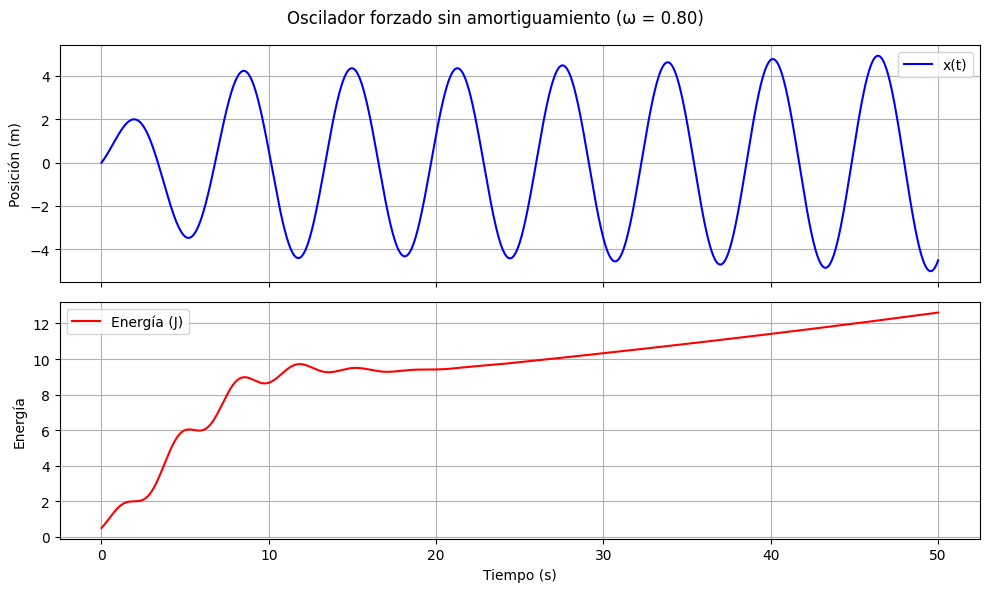

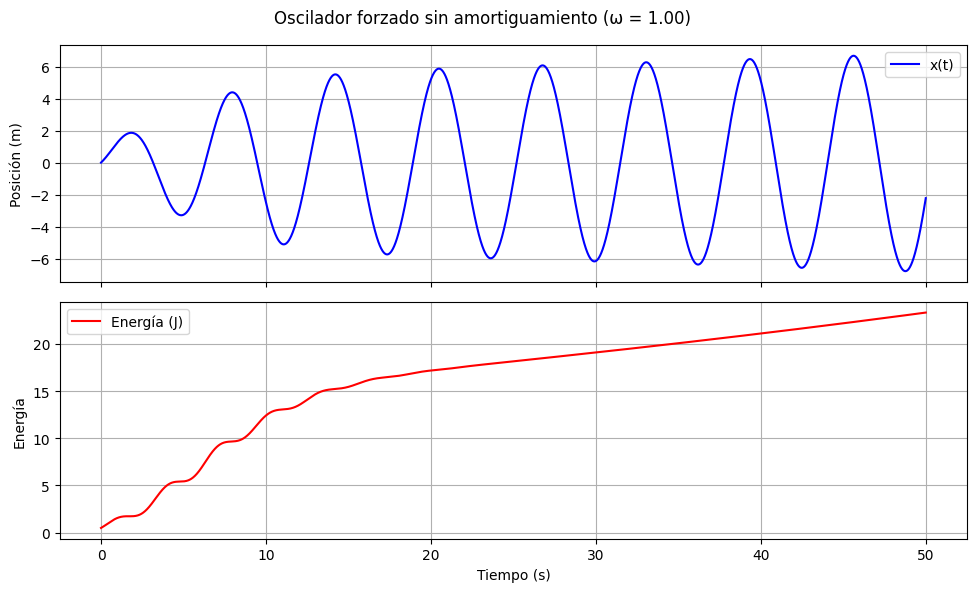

In [8]:
# Caso 2: Oscilador forzado sin amortiguamiento
F0 = 1.0
T_impulso = 10
gam = 0.0
omegas = [0, 0.8 * omega_0, omega_0]

for omega in omegas:
    t, x, E = integrar(gamma=gam, F0=F0, omega=omega, T=T_impulso)
    titulo = f"Oscilador forzado sin amortiguamiento (ω = {omega:.2f})"
    graficar_resultados(t, x, E, titulo)

# 7.

El **problema restringido de tres cuerpos** describe el movimiento de una partícula de masa despreciable bajo la influencia gravitacional de dos cuerpos masivos $m_1$ y $m_2$, que orbitan en trayectorias circulares alrededor de su centro de masa.  

Si tomamos un **sistema de referencia rotante** con velocidad angular $\omega$, cuyo origen está en el centro de masa del sistema y que gira con la misma velocidad angular que los cuerpos principales, las ecuaciones de movimiento de la partícula testigo son:  

$$
\ddot{x} - 2\omega \dot{y} = \frac{\partial U}{\partial x}, \quad  
\ddot{y} + 2\omega \dot{x} = \frac{\partial U}{\partial y},
$$  

donde $U$ es el **potencial efectivo** del sistema, definido como:  

$$
U = -\frac{G m_1}{r_1} - \frac{G m_2}{r_2} - \frac{1}{2} \omega^2 (x^2 + y^2).
$$

Aquí, $r_1$ y $r_2$ son las distancias del cuerpo de prueba a $m_1$ y $m_2$, respectivamente. En un sistema de coordenadas adimensionales donde la distancia entre los cuerpos principales es 1 y la constante gravitacional está absorbida en la normalización, la **velocidad angular del sistema** es:  

$$
\omega^2 = 1.
$$  

Existen cinco **puntos de Lagrange** $(L_1, L_2, L_3, L_4, L_5)$ donde las fuerzas gravitacionales y la aceleración centrífuga se equilibran.  

Los **puntos triangulares** $L_4$ y $L_5$ forman un triángulo equilátero con los cuerpos principales. Si colocamos $m_1$ en $(-\mu,0)$ y $m_2$ en $(1-\mu,0)$ en el sistema rotante, las coordenadas de $L_4$ y $L_5$ son:  

$$
L_4 = \left( \frac{1}{2} - \mu, \frac{\sqrt{3}}{2} \right), \quad  
L_5 = \left( \frac{1}{2} - \mu, -\frac{\sqrt{3}}{2} \right).
$$

Dado que estos puntos forman un triángulo equilátero con los cuerpos masivos, se cumple que la partícula testigo está a la misma distancia de ambos cuerpos:  

$$
r_1 = r_2.
$$


Para estudiar la estabilidad de $L_4$ y $L_5$, introducimos **pequeñas perturbaciones**. Por ejemplo, alrededor de $L_4$:  

$$
x = x_{L_4} + \xi, \quad y = y_{L_4} + \eta.
$$

Sustituyendo en las ecuaciones de movimiento y expandiendo el potencial efectivo en **serie de Taylor** hasta primer orden en $\xi$ y $\eta$, obtenemos el sistema de ecuaciones linealizado:  

$$
\frac{d}{dt}  
\begin{bmatrix}  
\xi \\ \dot{\xi} \\ \eta \\ \dot{\eta}  
\end{bmatrix}  
= \mathbf{A}  
\begin{bmatrix}  
\xi \\ \dot{\xi} \\ \eta \\ \dot{\eta}  
\end{bmatrix},
$$

donde la matriz **$\mathbf{A}$** tiene la forma:

$$
\mathbf{A} =
\begin{bmatrix}
0 & 1 & 0 & 0 \\
a & 0 & b & 2\omega \\
0 & 0 & 0 & 1 \\
c & -2\omega & d & 0
\end{bmatrix}.
$$

Los coeficientes de la matriz $\mathbf{A}$ están dados por las **segundas derivadas parciales del potencial efectivo $U$** evaluadas en $L_4$:

$$
a = \frac{\partial^2 U}{\partial x^2} (L_4), \quad
b = \frac{\partial^2 U}{\partial x \partial y} (L_4),
$$

$$
c = \frac{\partial^2 U}{\partial y \partial x} (L_4), \quad
d = \frac{\partial^2 U}{\partial y^2} (L_4).
$$

Esto mismo se hace para $L_5$- Luego, la estabilidad de $L_4$ y $L_5$ se determina analizando los **valores propios** de la matriz $\mathbf{A}$. Para que estos puntos sean estables, las soluciones deben ser oscilatorias, es decir, los valores propios deben ser imaginarios puros y no contener componentes reales positivas.  

- Encuentre los valores propios de la matriz $\mathbf{A}$ y analice su estabilidad.
- Determine el valor crítico de $\mu_c$ que garantiza la estabilidad de $L_i$ con $i = 4, 5$ para esto varie $\mu$ y examine cuando los valores propios cambian de ser reales a ser complejos. Encuentre dicho valor y compare con el denominado **criterio de Routh**
$$
\mu < \mu_c \approx 0.03852.
$$
- Finalmente, examine la estabilidad de $L_4$ y $L_5$ para el caso del Sol y la Tierra, o el Sol y Jupiter

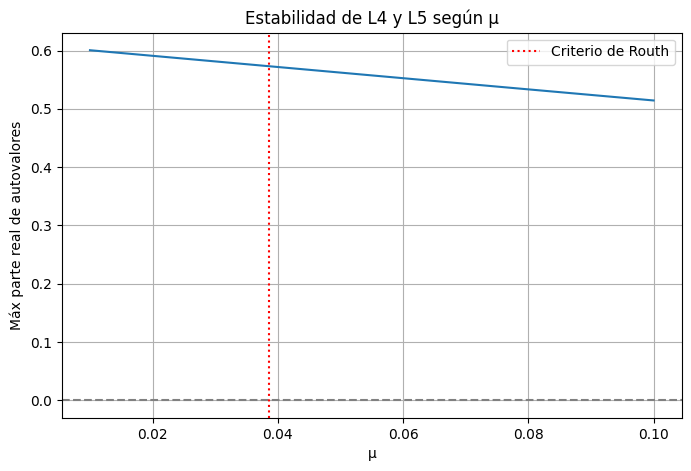


μ crítico ≈ 0.01000 (vs Routh: 0.03852)

==========Sol-Tierra==========
λ1: 0.0000+2.3178j
λ2: 0.0000-2.3178j
λ3: 0.6101+0.0000j
λ4: -0.6101+0.0000j
¿Estable? No

=========Sol-Júpiter==========
λ1: 0.0000+2.3176j
λ2: 0.0000-2.3176j
λ3: 0.6092+0.0000j
λ4: -0.6092+0.0000j
¿Estable? No


In [9]:
#Aquí va su código
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig

# 1. Derivadas segundas del potencial U en L4

def derivadas_segundas_U(mu):
    """
    Calcula las derivadas segundas del potencial efectivo U evaluadas en L4.

    Parámetro:
    - mu: masa reducida (mu = m2 / (m1 + m2))

    Retorna:
    - a, b, c, d: coeficientes de la matriz A
    """
    x_L4 = 0.5 - mu
    y_L4 = np.sqrt(3) / 2
    r1 = np.sqrt((x_L4 + mu)**2 + y_L4**2)
    r2 = np.sqrt((x_L4 - 1 + mu)**2 + y_L4**2)

    # Derivadas segundas (formulaciones simbólicas evaluadas en L4)
    dUxx = (1 - mu) * (3 * (x_L4 + mu)**2 - r1**2) / r1**5 \
         + mu * (3 * (x_L4 - 1 + mu)**2 - r2**2) / r2**5 - 1
    dUyy = (1 - mu) * (3 * y_L4**2 - r1**2) / r1**5 \
         + mu * (3 * y_L4**2 - r2**2) / r2**5 - 1
    dUxy = 3 * y_L4 * (
        (1 - mu) * (x_L4 + mu) / r1**5 +
        mu * (x_L4 - 1 + mu) / r2**5
    )

    return dUxx, dUxy, dUxy, dUyy  # a, b, c, d

# 2. Construir la matriz A y calcular autovalores

def matriz_A(mu, omega=1):
    """
    Construye la matriz A del sistema linealizado y calcula sus autovalores.

    Parámetros:
    - mu: masa reducida
    - omega: velocidad angular del sistema (por defecto 1)

    Retorna:
    - A: matriz 4x4
    - eigvals: valores propios de A
    """
    a, b, c, d = derivadas_segundas_U(mu)

    A = np.array([
        [0,     1,  0,     0],
        [a,     0,  b,  2*omega],
        [0,     0,  0,     1],
        [c, -2*omega, d,     0]
    ])
    eigvals = eig(A)[0]
    return A, eigvals

# 3. Buscar mu crítico

def encontrar_mu_critico(mu_vals):
    """
    Encuentra el valor crítico de mu para el cual aparecen valores propios con parte real > 0.

    Parámetro:
    - mu_vals: arreglo de valores de mu a probar

    Retorna:
    - mu_critico: primera mu donde hay inestabilidad
    """
    for mu in mu_vals:
        _, eigvals = matriz_A(mu)
        if np.any(np.real(eigvals) > 1e-5):
            return mu
    return None

# 4. Gráfica de parte real de los eigenvalores vs mu

def graficar_estabilidad():
    """
    Grafica la parte real de los valores propios vs mu para ver cuándo hay inestabilidad.
    """
    mu_vals = np.linspace(0.01, 0.1, 500)
    max_real_parts = []

    for mu in mu_vals:
        _, eigvals = matriz_A(mu)
        max_real = np.max(np.real(eigvals))
        max_real_parts.append(max_real)

    plt.figure(figsize=(8,5))
    plt.plot(mu_vals, max_real_parts)
    plt.axhline(0, color='gray', linestyle='--')
    plt.axvline(0.03852, color='red', linestyle=':', label='Criterio de Routh')
    plt.xlabel("μ")
    plt.ylabel("Máx parte real de autovalores")
    plt.title("Estabilidad de L4 y L5 según μ")
    plt.legend()
    plt.grid()
    plt.show()

# 5. Casos Sol-Tierra y Sol-Júpiter

def mostrar_casos_reales():
    """
    Evalúa estabilidad para:
    - Sol-Tierra: mu ≈ 3e-6
    - Sol-Júpiter: mu ≈ 9.5e-4
    """
    casos = {
        "Sol-Tierra": 3e-6,
        "Sol-Júpiter": 9.5e-4
    }

    for nombre, mu in casos.items():
        _, eigvals = matriz_A(mu)
        print(f"\n{nombre:=^30}")
        for i, ev in enumerate(eigvals):
            print(f"λ{i+1}: {ev:.4f}")
        estable = all(np.real(ev) < 1e-5 for ev in eigvals)
        print(f"¿Estable? {'Sí' if estable else 'No'}")


# EJECUCIÓN DEL ANÁLISIS

if __name__ == "__main__":
    graficar_estabilidad()

    mu_vals = np.linspace(0.01, 0.05, 1000)
    mu_critico = encontrar_mu_critico(mu_vals)
    print(f"\nμ crítico ≈ {mu_critico:.5f} (vs Routh: 0.03852)")

    mostrar_casos_reales()

# 8.

En la dinámica galáctica, el disco de una galaxia espiral puede presentar pequeñas perturbaciones que dan lugar a oscilaciones y ondas de densidad. Estas oscilaciones están gobernadas por la **ecuación de Jeans** en un disco delgado, que describe la evolución de perturbaciones en la densidad superficial $\Sigma(r,t)$ y la velocidad en presencia de la auto-gravitación del disco.  

Bajo la aproximación de pequeñas perturbaciones alrededor de un estado de equilibrio, las ecuaciones hidrodinámicas del sistema conducen a la ecuación diferencial:  

$$
\frac{d^2 \Sigma}{dt^2} + \kappa^2 \Sigma = 0,
$$

donde $\kappa$ es la **frecuencia de epicíclo**, que depende de la rotación del disco y describe la oscilación de una partícula en el plano del disco bajo pequeñas desviaciones de su órbita circular.  Muchas galaxias espirales presentan una curva de rotación aproximadamente **plana** a grandes radios, es decir, la velocidad de rotación $V(r)$ es aproximadamente constante:

$$
V(r) \approx V_0.
$$

En este caso, la frecuencia de epicíclo se puede aproximar como:

$$
\kappa \approx \sqrt{2} \Omega,
$$

donde:

$$
\Omega = \frac{V_0}{r}.
$$

- Graficar la evolución temporal de $\Sigma(t)$.  
- Calcular los valores propios de la matriz del sistema y discutir su relación con la estabilidad del disco.  
- Comparar los resultados numéricos con la solución analítica de la ecuación diferencial.  
- Analizar cómo cambia la estabilidad del sistema al modificar $\kappa$.  


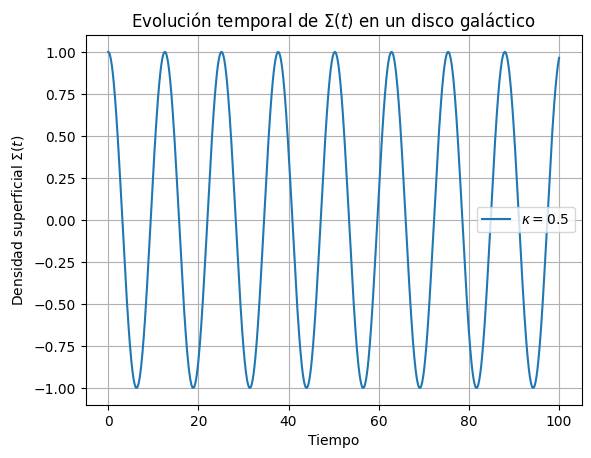

In [10]:
#Aquí va su código
import numpy as np
import matplotlib.pyplot as plt

def sigma_analitica(t, kappa, A=1.0, B=0.0):
    """
    Solución analítica de la ecuación de Jeans:
    d²Σ/dt² + κ² Σ = 0

    Parámetros:
    - t: array de tiempos
    - kappa: frecuencia de epicíclo (float)
    - A, B: constantes de integración

    Retorna:
    - Σ(t): valores de la función de densidad superficial
    """
    return A * np.cos(kappa * t) + B * np.sin(kappa * t)

# Parámetros
kappa = 0.5  # frecuencia de epicíclo
t = np.linspace(0, 100, 1000)

# Graficar
plt.plot(t, sigma_analitica(t, kappa), label=f"$\\kappa = {kappa}$")
plt.xlabel("Tiempo")
plt.ylabel("Densidad superficial $\\Sigma(t)$")
plt.title("Evolución temporal de $\\Sigma(t)$ en un disco galáctico")
plt.grid(True)
plt.legend()
plt.show()

In [11]:
import numpy.linalg as la

def calcular_valores_propios(kappa):
    """
    Calcula los valores propios del sistema asociado a la ecuación de Jeans.

    Parámetros:
    - kappa: frecuencia de epicíclo

    Retorna:
    - valores_propios: array con los eigenvalores
    """
    A = np.array([[0, 1],
                  [-kappa**2, 0]])
    valores_propios = la.eigvals(A)
    return valores_propios

# Cálculo
vp = calcular_valores_propios(kappa)
print("Valores propios:", vp)

Valores propios: [0.+0.5j 0.-0.5j]


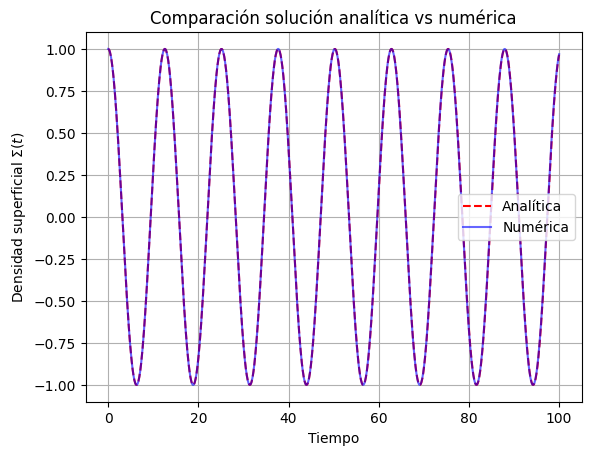

In [12]:
from scipy.integrate import solve_ivp

def sistema(t, Y, kappa):
    """
    Sistema de primer orden equivalente a la ecuación de Jeans.
    """
    sigma, v = Y
    return [v, -kappa**2 * sigma]

# Condiciones iniciales
y0 = [1.0, 0.0]  # Sigma(0) = 1, dSigma/dt(0) = 0

sol = solve_ivp(sistema, [0, 100], y0, args=(kappa,), t_eval=t)

# Graficar comparación
plt.plot(t, sigma_analitica(t, kappa), 'r--', label="Analítica")
plt.plot(sol.t, sol.y[0], 'b', alpha=0.6, label="Numérica")
plt.xlabel("Tiempo")
plt.ylabel("Densidad superficial $\\Sigma(t)$")
plt.title("Comparación solución analítica vs numérica")
plt.legend()
plt.grid(True)
plt.show()

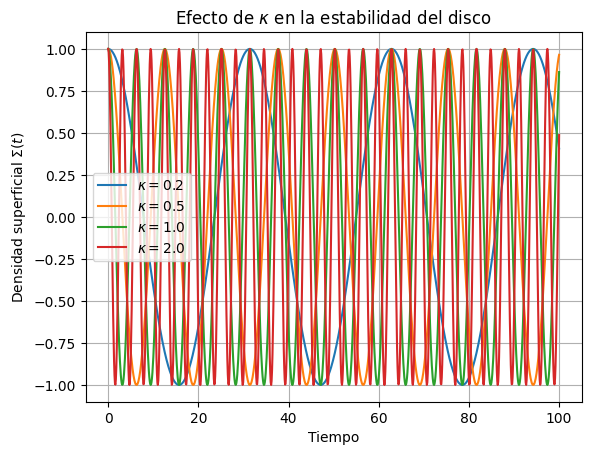

In [13]:
# Diferentes valores de kappa
kappas = [0.2, 0.5, 1.0, 2.0]
plt.figure()

for k in kappas:
    sigma_t = sigma_analitica(t, k)
    plt.plot(t, sigma_t, label=f"$\\kappa = {k}$")

plt.xlabel("Tiempo")
plt.ylabel("Densidad superficial $\\Sigma(t)$")
plt.title("Efecto de $\\kappa$ en la estabilidad del disco")
plt.legend()
plt.grid(True)
plt.show()

# 9.
El método *Leapfrog* (o salto de rana) es un algoritmo numérico de segundo orden utilizado para integrar ecuaciones diferenciales ordinarias, especialmente en problemas de mecánica clásica donde se conserva la energía. Este método es particularmente útil para sistemas Hamiltonianos.

Considere la siguiente ecuación diferencial de segundo orden:
$$
\frac{d^2 x}{dt^2} = f(x),
$$
la cual puede descomponerse en un sistema acoplado de ecuaciones de primer orden:
$$
\frac{dx}{dt} = v, \quad \frac{dv}{dt} = f(x).
$$

El método Leapfrog actualiza las variables en pasos intercalados de tiempo ($\Delta t$) mediante las siguientes fórmulas:
$$
v_{n+1/2} = v_{n-1/2} + f(x_n) \Delta t,
$$
$$
x_{n+1} = x_n + v_{n+1/2} \Delta t.
$$

Escriba un programa en Python que utilice el método Leapfrog para resolver el problema del oscilador armónico, donde $f(x) = -\omega^2 x$ con $\omega = 2$ rad/s. Use condiciones iniciales $x(0) = 1$ y $v(0) = 0$, y un paso de tiempo $\Delta t = 0.01$ s en el intervalo $t \in [0, 10]$ s.


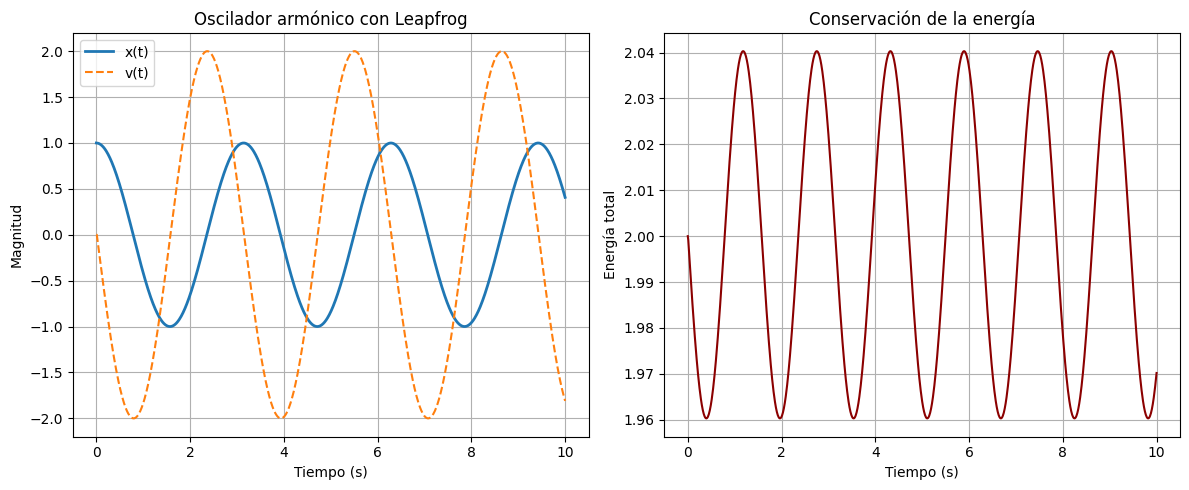

In [14]:
#Aquí va su código
import numpy as np
import matplotlib.pyplot as plt

def leapfrog_oscillator(f, x0, v0, t_max, dt):
    """
    Resuelve un sistema de ecuaciones diferenciales de segundo orden
    utilizando el método Leapfrog.

    Parámetros
    f : function
        Función que representa la aceleración: f(x) = d²x/dt².
    x0 : float
        Posición inicial x(0).
    v0 : float
        Velocidad inicial v(0).
    t_max : float
        Tiempo máximo de integración.
    dt : float
        Paso de tiempo.

    Retorna
    t : ndarray
        Arreglo de tiempos.
    x : ndarray
        Arreglo de posiciones en el tiempo.
    v : ndarray
        Arreglo de velocidades en el tiempo.
    """
    N = int(t_max / dt)
    t = np.linspace(0, t_max, N + 1)

    x = np.zeros(N + 1)
    v_half = np.zeros(N + 1)  # v en los medios pasos
    v = np.zeros(N + 1)       # v interpolada para energía

    x[0] = x0
    v_half[0] = v0 - 0.5 * dt * f(x0)  # inicialización Leapfrog (paso hacia atrás de medio paso)

    for n in range(N):
        v_half[n + 1] = v_half[n] + f(x[n]) * dt     # Actualización de velocidad en medio paso
        x[n + 1] = x[n] + v_half[n + 1] * dt         # Actualización de posición
        v[n + 1] = v_half[n + 1] - 0.5 * dt * f(x[n + 1])  # Velocidad centrada (opcional)

    return t, x, v

# Parámetros del sistema
omega = 2  # rad/s
f = lambda x: -omega**2 * x

# Condiciones iniciales
x0 = 1.0
v0 = 0.0
t_max = 10.0
dt = 0.01

# Integración con Leapfrog
t, x, v = leapfrog_oscillator(f, x0, v0, t_max, dt)

# Cálculo de energía total
E = 0.5 * (v**2 + (omega**2) * x**2)

# Gráficas
plt.figure(figsize=(12, 5))

# Posición y velocidad
plt.subplot(1, 2, 1)
plt.plot(t, x, label='x(t)', linewidth=2)
plt.plot(t, v, label='v(t)', linestyle='--')
plt.xlabel("Tiempo (s)")
plt.ylabel("Magnitud")
plt.title("Oscilador armónico con Leapfrog")
plt.legend()
plt.grid(True)

# Energía
plt.subplot(1, 2, 2)
plt.plot(t, E, color='darkred')
plt.xlabel("Tiempo (s)")
plt.ylabel("Energía total")
plt.title("Conservación de la energía")
plt.grid(True)

plt.tight_layout()
plt.show()